In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://github.com/huynhthanh98/ML/raw/ML-2022/Lab05/data.csv")

In [3]:
df.head()

,x1,x2
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780


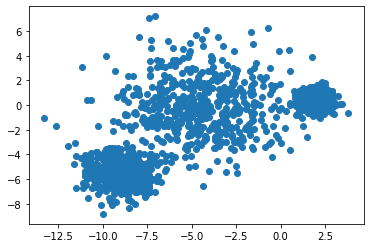

In [4]:
plt.scatter(df['x1'].values, df['x2'].values)

In [12]:
X=np.array(df.values)
print(X.shape)

(1500, 2)


## UTILS

In [388]:
np.unique(cluster_idx)

array([0, 1, 2, 3, 4, 5, 6])

In [567]:
def onehot(cluster_idx, n_clusters):
    a=cluster_idx
    b=np.zeros((a.size, n_clusters))
    b[np.arange(a.size),a]=1 
    return b.astype(int)

## KMeans

In [579]:
def centroids_calc(X, cluster_idx, n_clusters):
    # calculate the centroids for each cluster  
    centroids=np.zeros([n_clusters, X.shape[1]])
    for i in np.unique(cluster_idx): 
        centroids[i] = np.array(np.mean(X[(cluster_idx == i), :], axis = 0))
    return centroids  

In [580]:
def update_centroid_index(X, centroids, n_clusters):
    # distance to each cluster   
    distances_arr=np.array([norm(X - centroids[i, :], axis=1) 
                              for i in range(n_clusters)])
    # get argmin to assign cluster  
    cluster_idx=np.argmin(distances_arr, axis=0)
    return cluster_idx

## Calculating Within-Cluster-Variation
 We have 
- Set of observation $(x_{1}, x_{2}, x_{3}, ...x_{n})$
- We want to classify n observation in to k class  k <n in set $S = \{S_{1}, S_{2},..., S_{k}\}$ 


Instead of calculating the within-cluster variation of each points to others, we calculating the distance (Euclid) to the mean of each class: 
$argmin\sum_{i=1}^{k} \sum_{x \in S_{i}} \|x-\mu_{i} \|^{2}$  

Source: https://en.wikipedia.org/wiki/K-means_clustering 

In [581]:
def kmean(X, n_clusters):
    n_clusters=2
    n = X.shape[0]
    cluster_idx = np.random.randint(0, n_clusters, n) 
    i=0
    while True:
        i+=1
        centroids=centroids_calc(X, cluster_idx, n_clusters) 
        prev_cluster_idx=cluster_idx
        cluster_idx=update_centroid_index(X, centroids, n_clusters)
        if np.sum(cluster_idx!=prev_cluster_idx)==0:
            _all_d=np.array([np.sum(np.square(X - centroids[i, :]), axis=1) 
                                for i in range(centroids.shape[0])])
            print(np.unique(cluster_idx))
            _d=np.sum(_all_d.T * onehot(cluster_idx, n_clusters))
            return (cluster_idx, _d, centroids)
        elif i == 1000:
            break

In [589]:
kmeans(X, 2)

(array([0, 0, 0, ..., 1, 1, 1]), 3919.3459656147234)

In [600]:
def kmeans_clustering(X, n_clusters):
    n_clusters=n_clusters
    n = X.shape[0]
    cluster_idx = np.random.randint(0, n_clusters, n) 
    i=0
    while True:
        i+=1
        centroids=centroids_calc(X, cluster_idx, n_clusters) 
        prev_cluster_idx=cluster_idx
        cluster_idx=update_centroid_index(X, centroids, n_clusters)
        if np.sum(cluster_idx!=prev_cluster_idx)==0:
            _all_d=np.array([norm(X - centroids[i, :], axis=1) 
                                for i in range(centroids.shape[0])])
            _d=np.sum(_all_d.T * onehot(cluster_idx, n_clusters))
            return (cluster_idx, _d, centroids)
        elif i == 1000:
            break 

In [593]:
_KMean(X, n_clusters)

(array([1, 1, 1, ..., 0, 0, 0]),
 3919.3459656147234,
 array([[ 0.01951724,  0.55026022],
        [-8.2503824 , -4.26155033]]))

In [601]:
dist=[] 
idx=[]
c=10
col=3
for i, k in enumerate(range(1,c+1)):
    (cluster_idx, _d, centroids) = kmeans_clustering(X, k) 

In [602]:
k

10

In [ ]:
f, axs = plt.subplots(2,2,figsize=(15,15))

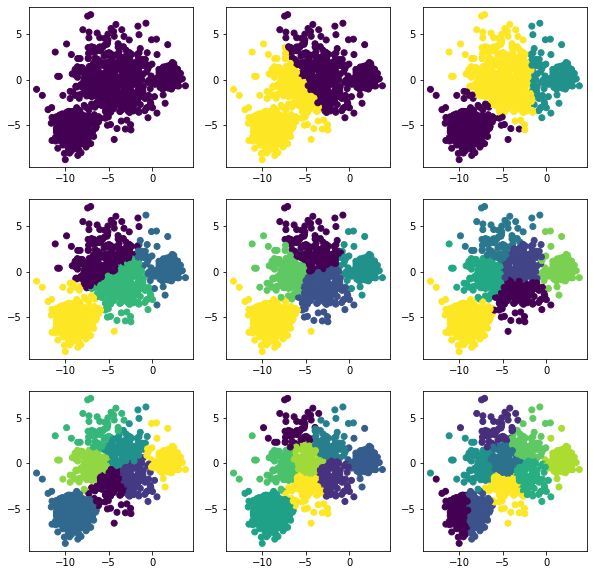

In [633]:
import math
dist=[] 
idx=[]
c=9
ncol=3
nrow=c//3+math.ceil(c/col-c//col)
figure, axis = plt.subplots(nrow, ncol, figsize=(10,10))
for i, k in enumerate(range(1,c+1)):
    (cluster_idx, _d, centroids) = kmeans_clustering(X, k) 
    pos=(i//3, i%3)
    axis[pos].scatter(X[:, 0], X[:, 1], c=cluster_idx)


In [652]:
dists=[]
n_clusters=[]

for i in range(1, 15):
    (cluster_idx, _d, centroids)=kmeans_clustering(X, i) 
    dists.append(_d) 
    n_clusters.append(i)
dists=np.array(dists)
n_clusters=np.array(n_clusters)

 

Text(0, 0.5, 'Total Variance')

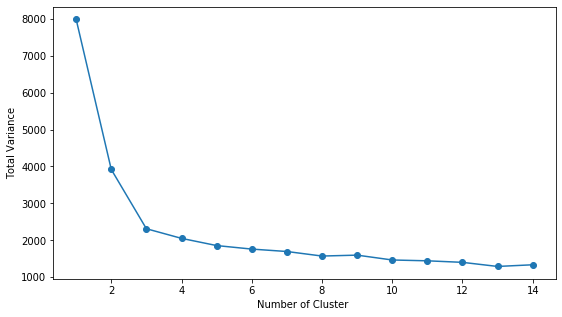

In [657]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.plot(n_clusters, dists, marker='o')
plt.xlabel("Number of Cluster ")
plt.ylabel("Total Variance") 